# Visualization with Pandas, and Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Stacking area charts to discover emerging trends

In [3]:
meetup = pd.read_csv('data/meetup_groups.csv', 
                     parse_dates=['join_date'], 
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [4]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [5]:
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [6]:
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [7]:
row_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(row_total, axis='index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


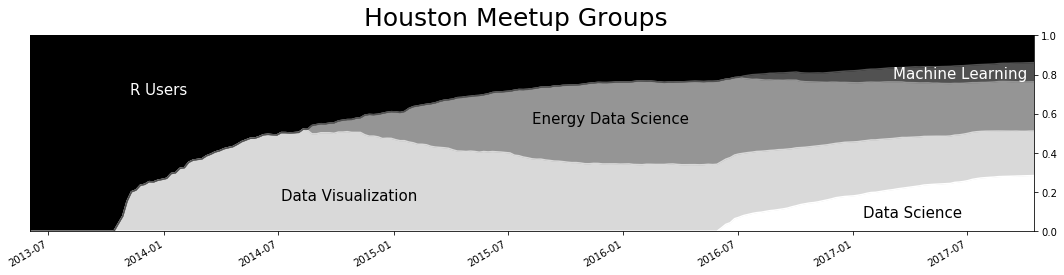

In [8]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None), 
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.1, .7), s='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), s='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning', color='w', **plot_kwargs)

In [9]:
pie_data = group_cum_pct.asfreq('3MS', method='bfill') \
                        .tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


E:\Anc\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


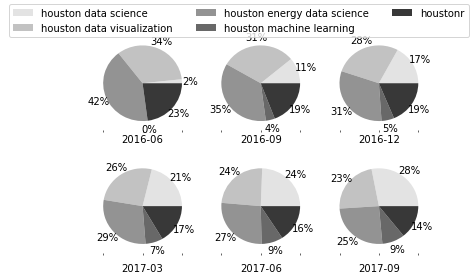

In [10]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

ax_array = pie_data.plot(kind='pie', subplots=True, 
                         layout=(2,3), labels=None,
                         autopct='%1.0f%%', pctdistance=1.22,
                         colors=greys)
ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol=3)
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
ax1.figure.subplots_adjust(hspace=.3)

### Understanding the differences between seaborn and pandas

In [11]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [12]:
import seaborn as sns

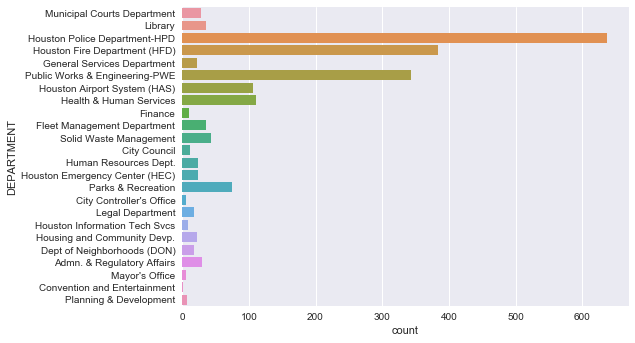

In [13]:
sns.countplot(y='DEPARTMENT', data=employee)

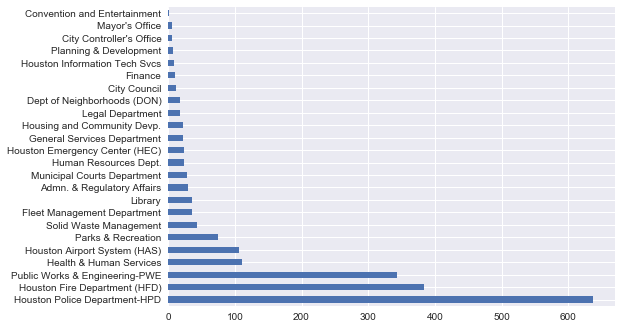

In [14]:
employee['DEPARTMENT'].value_counts().plot('barh')

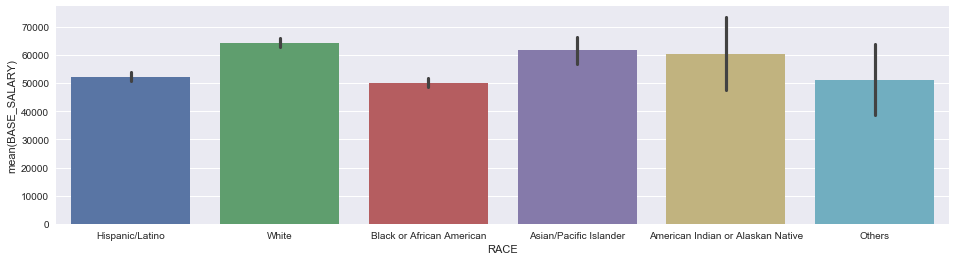

In [15]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

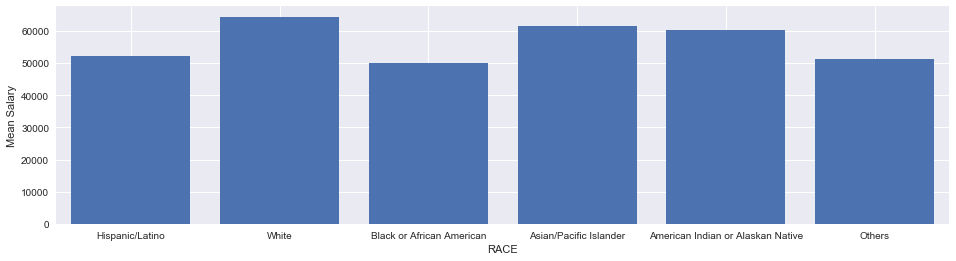

In [16]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

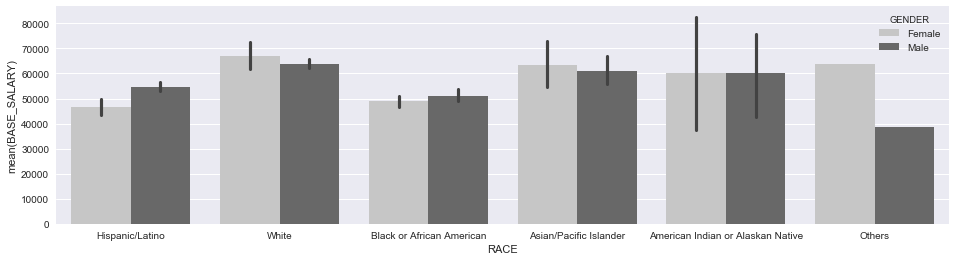

In [17]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', 
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

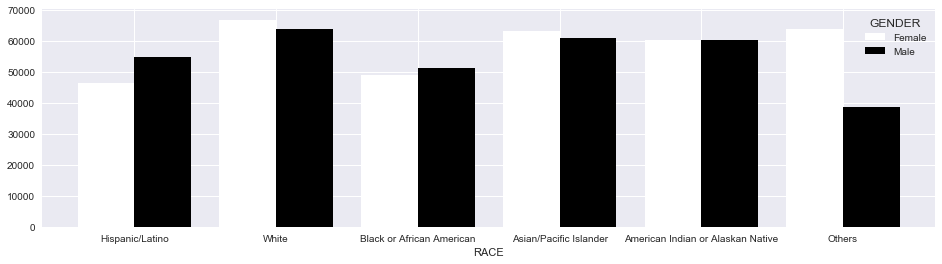

In [18]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

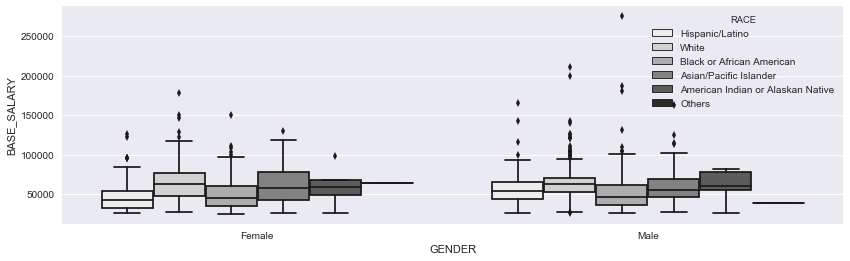

In [19]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

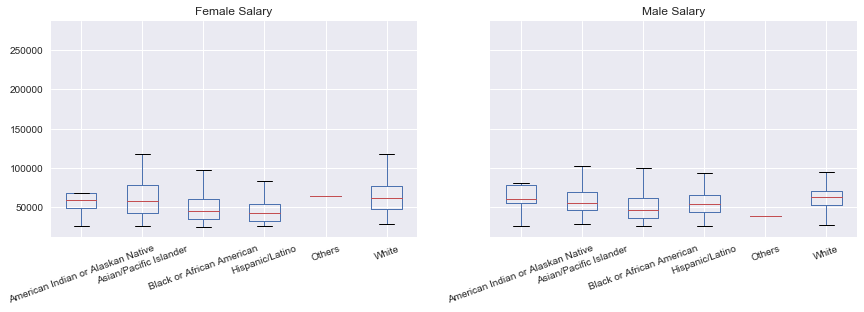

In [20]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

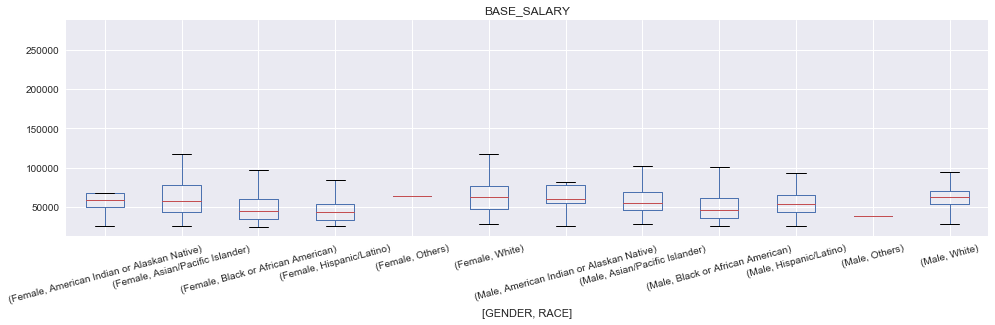

In [21]:
ax = employee.boxplot(by=['GENDER', 'RACE'], 
                      column='BASE_SALARY', 
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

### Doing multivariate analysis with seaborn Grids

In [22]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(1, unit='Y')
employee['YEARS_EXPERIENCE'] =  days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


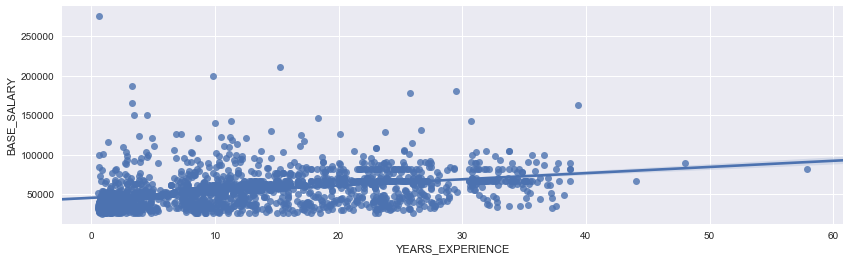

In [23]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

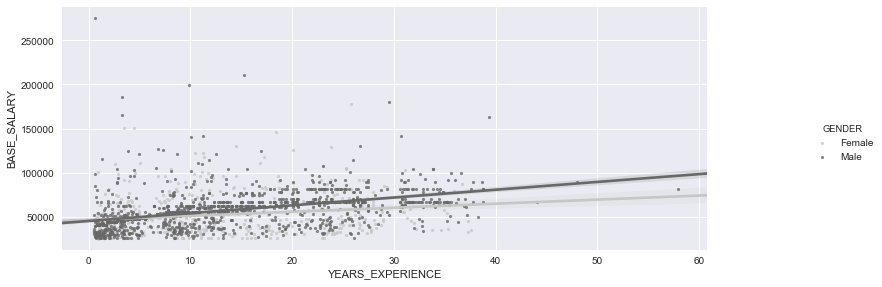

In [24]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':10}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

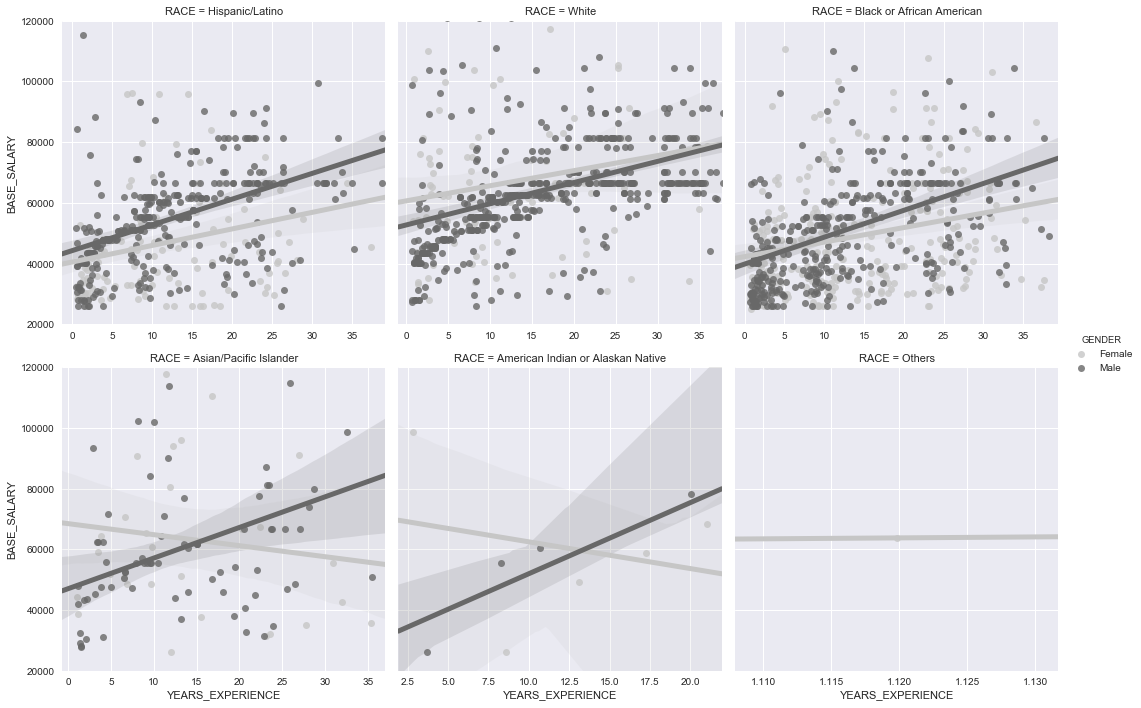

In [25]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))

In [26]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
emp2.shape

(968, 11)

In [27]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [28]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

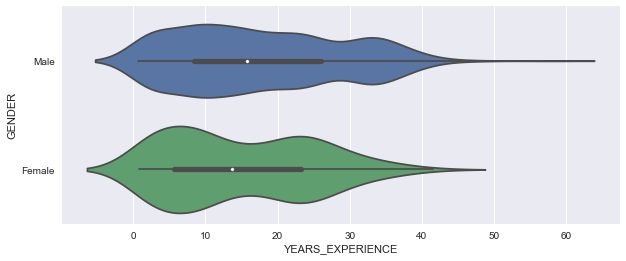

In [29]:
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)

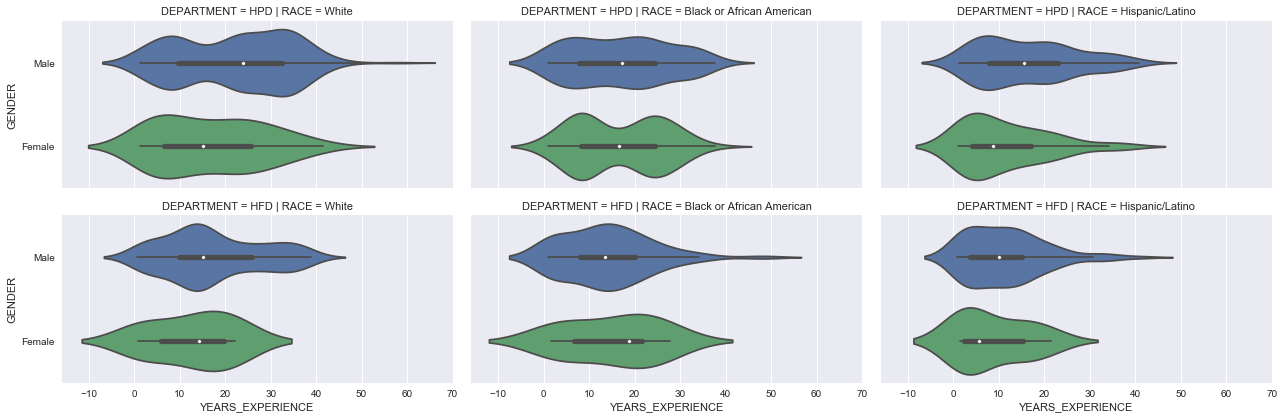

In [30]:
sns.factorplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT', 
               size=3, aspect=2,
               data=emp2, kind='violin')

### Uncovering Simpson's paradox in the diamonds dataset with seaborn

In [31]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Raw Score': ['50/100', '80/100'], 
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

,Raw Score,Percent Correct
Student A,50/100,50
Student B,80/100,80


In [32]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Difficult': ['45/95', '2/5'], 
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]}, 
             columns=['Difficult', 'Easy', 'Difficult Percent', 'Easy Percent', 'Total Percent'])

,Difficult,Easy,Difficult Percent,Easy Percent,Total Percent
Student A,45/95,5/5,47,100,50
Student B,2/5,78/95,40,82,80


In [33]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                 categories=cut_cats, 
                                 ordered=True)

diamonds['color'] = pd.Categorical(diamonds['color'],
                                   categories=color_cats, 
                                   ordered=True)

diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                     categories=clarity_cats, 
                                     ordered=True)

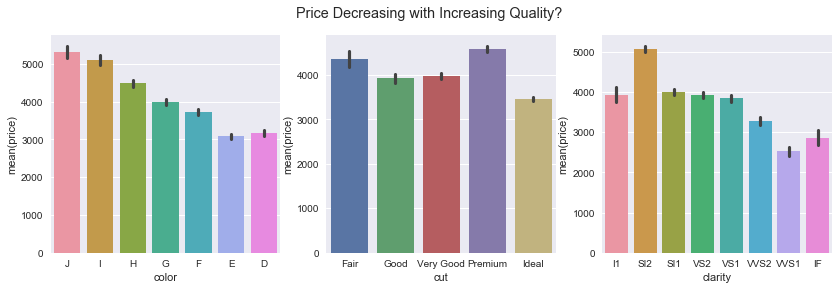

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

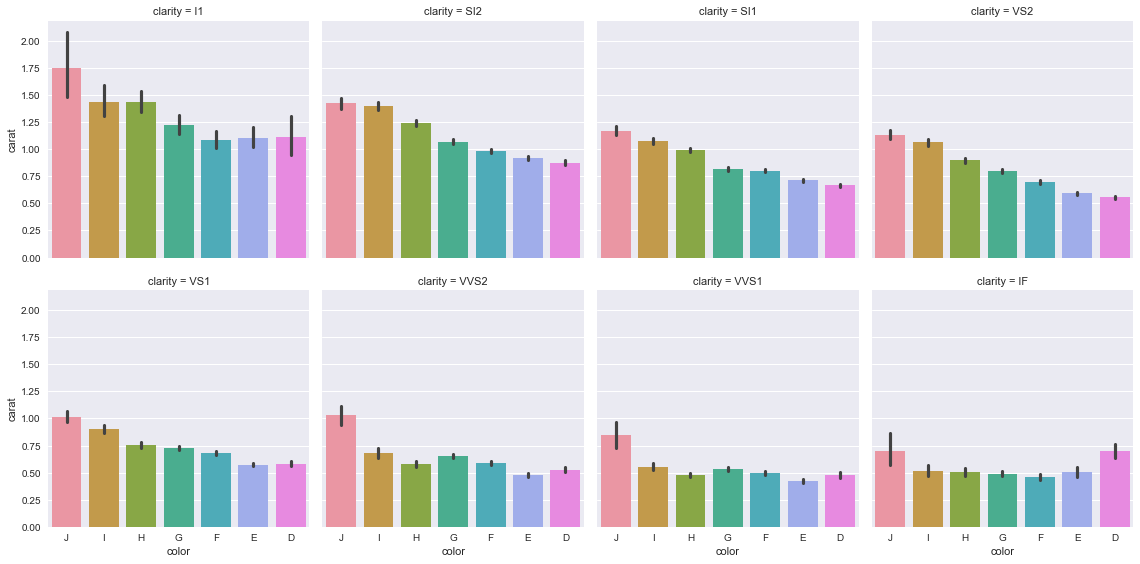

In [36]:
sns.factorplot(x='color', y='carat', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

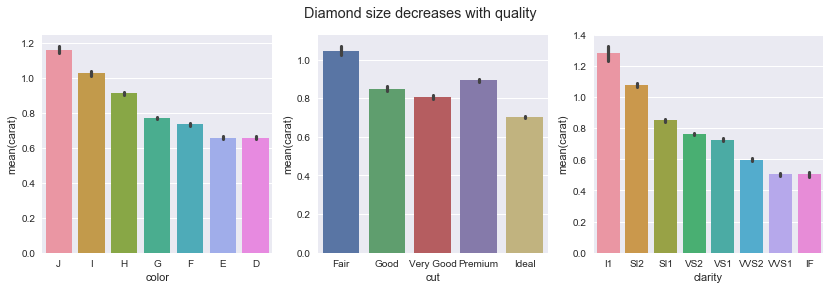

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

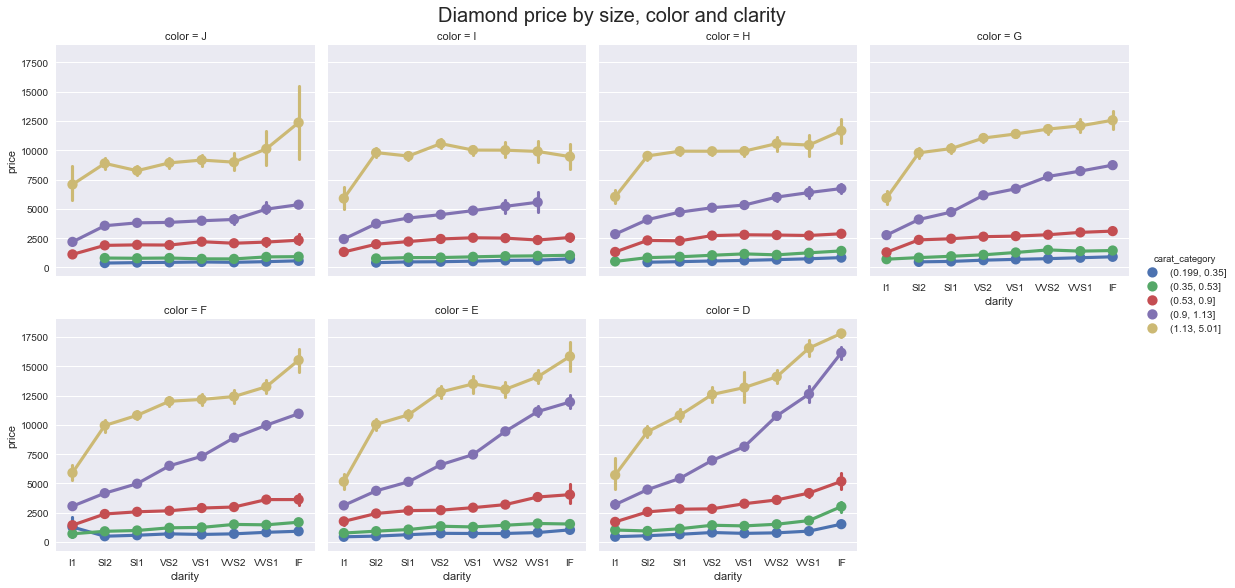

In [38]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

g = sns.factorplot(x='clarity', y='price', data=diamonds,
                   hue='carat_category', col='color', 
                   col_wrap=4, kind='point') #, palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',
               y=1.02, size=20)

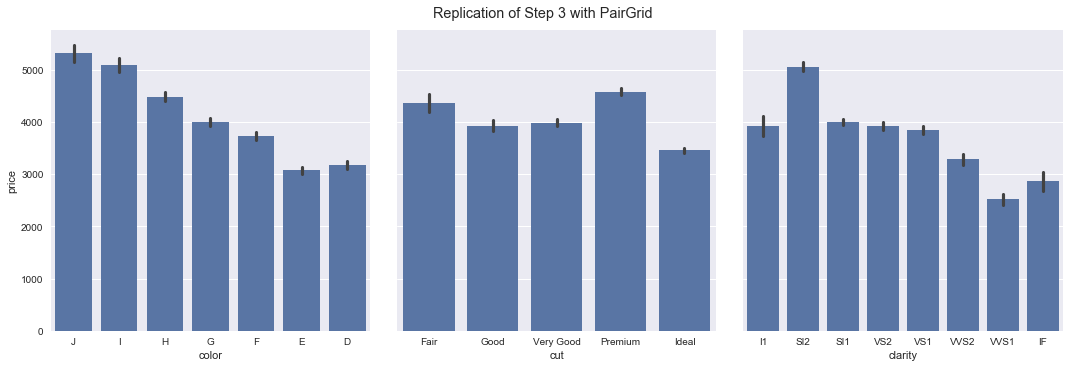

In [39]:
g = sns.PairGrid(diamonds,size=5,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)